Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9534883720930233
F1 score: 0.9761904761904763
ROC-AUC: 0.9980347199475925


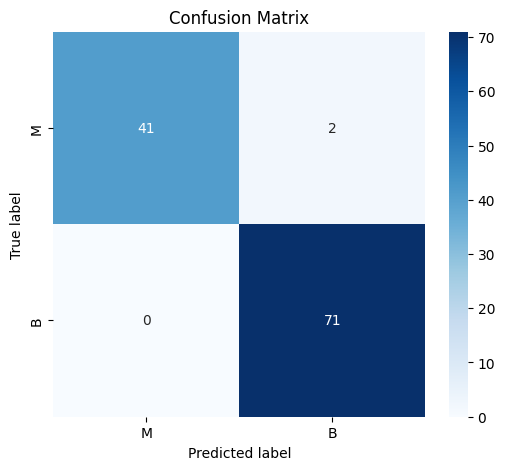

<Figure size 600x500 with 0 Axes>

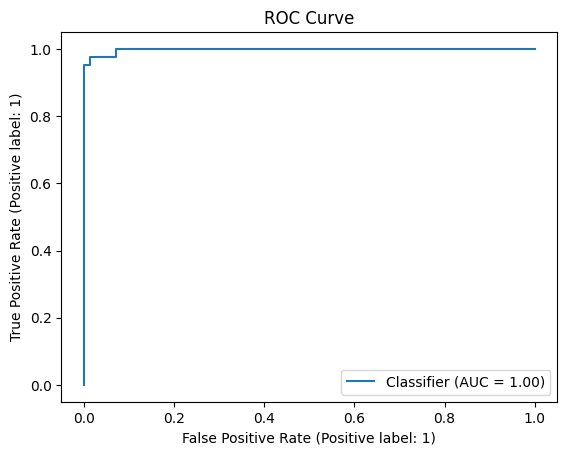

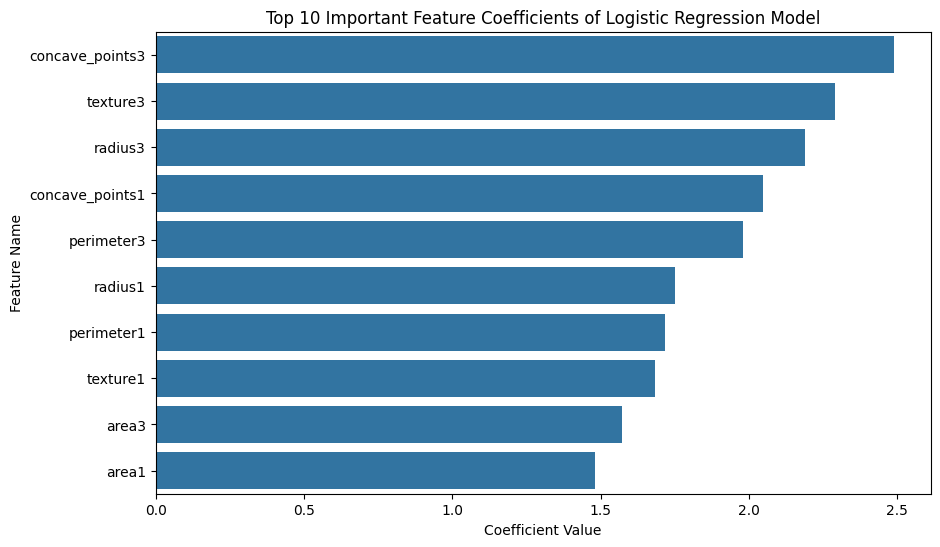

In [ ]:
from ucimlrepo import fetch_ucirepo  # Import UCI dataset
from sklearn.model_selection import train_test_split  # For splitting train and test sets
from sklearn.preprocessing import MinMaxScaler  # For feature normalization
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay  # Various evaluation metrics
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Visualization
import numpy as np

# Get the Wisconsin Diagnostic Breast Cancer dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Extract features and labels
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Normalize features
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# Split train and test sets, test set is 20%
X_train, X_test, y_train, y_test = train_test_split(X_norm, y.values.ravel(), test_size=0.2, random_state=42)

# Initialize and train logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
roc_auc = roc_auc_score((y_test == 'M').astype(int), y_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("ROC-AUC:", roc_auc)

# Compute and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['M', 'B'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['M', 'B'], yticklabels=['M', 'B'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
plt.figure(figsize=(6,5))
RocCurveDisplay.from_predictions((y_test == 'M').astype(int), y_proba)
plt.title('ROC Curve')
plt.show()

# Visualize the top 10 most important feature coefficients of the logistic regression model
plt.figure(figsize=(10,6))
coefs = clf.coef_[0]
feature_names = X.columns
coef_df = list(zip(feature_names, coefs))
coef_df = sorted(coef_df, key=lambda x: abs(x[1]), reverse=True)
top_features = coef_df[:10]
names, values = zip(*top_features)
sns.barplot(x=values, y=names, orient='h')
plt.title('Top 10 Important Feature Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.show()
